In [25]:
ls

DNA-encoded-library.csv  sample_data/


In [26]:
import pandas as pd

In [27]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from rdkit import Chem

In [29]:
dna_lib = pd.read_csv("DNA-encoded-library.csv")

In [30]:
dna_lib

,target,molecule_id,smiles
0,ERa,CHEMBL100231,CC(C)c1ccc(cc1)N2CCc3cc(O)ccc3C2(C)c4ccc(OCCN5...
1,ERa,CHEMBL10041,CC\C(=C(/c1ccccc1)\c2ccc(OCCN(C)C)cc2)\c3ccc(O...
2,ERa,CHEMBL100595,CC(C)c1cccc(c1)N2CCc3cc(O)ccc3C2(C)c4ccc(OCCN5...
3,ERa,CHEMBL100617,CC1(N(CCc2cc(O)ccc12)c3cccc(O)c3)c4ccc(OCCN5CC...
4,ERa,CHEMBL100763,CC1(N(CCc2cc(O)ccc12)c3ccc(Cl)cc3)c4ccc(OCCN5C...
...,...,...,...
5162,sEH,CHEMBL68172,CCOC(=O)c1ccc(COC(=O)CCCNC(=O)NC23CC4CC(CC(C4)...
5163,sEH,CHEMBL68344,COCCCNC(=O)NC1CCCCC1
5164,sEH,CHEMBL69663,CCCCCCCCCCNC(=O)NC12CC3CC(CC(C3)C1)C2
5165,sEH,CHEMBL70231,CCOC(=O)CCCCCCCCCCOC(=O)CCCNC(=O)NC12CC3CC(CC(...


In [31]:
dna_lib["target"].value_counts()

ERa      2272
sEH      1607
c-KIT    1288
Name: target, dtype: int64

In [32]:
dna_lib["ERa"] = dna_lib["target"].apply(lambda x: 1 if x=="ERa" else 0)

In [33]:
dna_lib["sEH"] = dna_lib["target"].apply(lambda x: 1 if x=="sEH" else 0)

In [34]:
dna_lib["c-KIT"] = dna_lib["target"].apply(lambda x: 1 if x=="c-KIT" else 0)

In [35]:
dna_lib

,target,molecule_id,smiles,ERa,sEH,c-KIT
0,ERa,CHEMBL100231,CC(C)c1ccc(cc1)N2CCc3cc(O)ccc3C2(C)c4ccc(OCCN5...,1,0,0
1,ERa,CHEMBL10041,CC\C(=C(/c1ccccc1)\c2ccc(OCCN(C)C)cc2)\c3ccc(O...,1,0,0
2,ERa,CHEMBL100595,CC(C)c1cccc(c1)N2CCc3cc(O)ccc3C2(C)c4ccc(OCCN5...,1,0,0
3,ERa,CHEMBL100617,CC1(N(CCc2cc(O)ccc12)c3cccc(O)c3)c4ccc(OCCN5CC...,1,0,0
4,ERa,CHEMBL100763,CC1(N(CCc2cc(O)ccc12)c3ccc(Cl)cc3)c4ccc(OCCN5C...,1,0,0
...,...,...,...,...,...,...
5162,sEH,CHEMBL68172,CCOC(=O)c1ccc(COC(=O)CCCNC(=O)NC23CC4CC(CC(C4)...,0,1,0
5163,sEH,CHEMBL68344,COCCCNC(=O)NC1CCCCC1,0,1,0
5164,sEH,CHEMBL69663,CCCCCCCCCCNC(=O)NC12CC3CC(CC(C3)C1)C2,0,1,0
5165,sEH,CHEMBL70231,CCOC(=O)CCCCCCCCCCOC(=O)CCCNC(=O)NC12CC3CC(CC(...,0,1,0


In [44]:
dna_lib.to_csv("prepared-dna-lib.csv", index=None)

In [36]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import deepchem

In [45]:
from deepchem.utils.save import load_from_disk

dataset_file= "prepared-dna-lib.csv"

In [46]:
dataset = load_from_disk(dataset_file)

In [47]:
print(dataset.columns.values)

['target' 'molecule_id' 'smiles' 'ERa' 'sEH' 'c-KIT']


In [48]:
import seaborn as sns
from matplotlib import pyplot as plt
tasks = ['ERa','sEH','c-KIT']

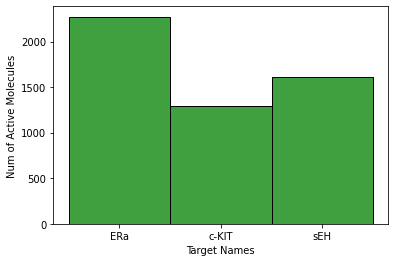

In [51]:
plt.ylabel("Num of Active Molecules")
plt.xlabel("Target Names")
sns.histplot(dataset["target"], color="g")

In [52]:
import deepchem as dc

featurizer = dc.feat.ConvMolFeaturizer()

In [53]:
loader = dc.data.CSVLoader(
      tasks=tasks, smiles_field="smiles",
      featurizer=featurizer)
dataset = loader.featurize(dataset_file)
dataset

smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.
/usr/local/lib/python3.7/dist-packages/deepchem/data/data_loader.py:163: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  "featurize() will be removed in DeepChem 3.0", FutureWarning)


<DiskDataset X.shape: (5167,), y.shape: (5167, 3), w.shape: (5167, 3), task_names: ['ERa' 'sEH' 'c-KIT']>

In [56]:
n_tasks = len(tasks)

In [54]:
splitter = dc.splits.ScaffoldSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)

In [55]:
transformers = [dc.trans.transformers.BalancingTransformer(dataset=train_dataset)]

for dataset in [train_dataset,valid_dataset, test_dataset]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)

In [57]:
model = dc.models.GraphConvModel(n_tasks=n_tasks, mode='classification', batch_size=8, learning_rate=0.0005, model_dir='/content/model1', optimizer=dc.models.optimizers.Adam())
model.fit(train_dataset, nb_epoch=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(35,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(35, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(250,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_16:0"

0.002541406452655792

In [74]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train_dataset, [metric], transformers))
# print('Testing set score:', model.evaluate(test_dataset, [metric], transformers))

Training set score: {'roc_auc_score': 0.9999982030278943}


In [59]:
preds = model.predict(test_dataset)

In [64]:
import numpy as np
import pandas as pd

In [65]:
pred_class = np.argmax(preds, axis=-1)

In [66]:
pred_df = pd.DataFrame(pred_class)

In [70]:
pred_df.columns = tasks

In [73]:
pred_df

,ERa,sEH,c-KIT
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
512,1,0,0
513,1,0,0
514,1,0,0
515,1,0,0


In [ ]:
}